<a href="https://colab.research.google.com/github/anushavasup/safedriverprediction_comparison_variousmethods/blob/main/safedriver_prediction_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
%matplotlib inline
Insurance = pd.read_csv(r'/Insurance.csv') 
print (Insurance.shape)
Insurance.head()

(46414, 59)


,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10.0,1.0,-1.0,0.0,1.0,4.0,1.0,0.0,0.0,1.0,12.0,2.0,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3.0,1.0,10.0,1.0,10.0,1.0,5.0,9.0,1.0,5.0,8.0,0.0,1.0,1.0,0.0,0.0,1.0
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11.0,1.0,-1.0,0.0,-1.0,11.0,1.0,1.0,2.0,1.0,19.0,3.0,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2.0,1.0,9.0,5.0,8.0,1.0,7.0,3.0,1.0,1.0,9.0,0.0,1.0,1.0,0.0,1.0,0.0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7.0,1.0,-1.0,0.0,-1.0,14.0,1.0,1.0,2.0,1.0,60.0,1.0,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2.0,2.0,9.0,1.0,8.0,2.0,7.0,4.0,2.0,7.0,7.0,0.0,1.0,1.0,0.0,1.0,0.0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7.0,1.0,0.0,0.0,1.0,11.0,1.0,1.0,3.0,1.0,104.0,1.0,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2.0,4.0,7.0,1.0,8.0,4.0,2.0,2.0,2.0,4.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11.0,1.0,-1.0,0.0,-1.0,14.0,1.0,1.0,2.0,1.0,82.0,3.0,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2.0,2.0,6.0,3.0,10.0,2.0,12.0,3.0,1.0,1.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0


Text(0.5, 0, 'target')

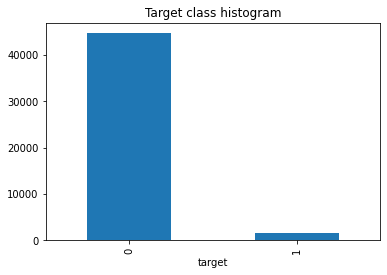

In [15]:
# Graph to show the Higly Imbalanced Data. To Predict the Column ['target']. Right now.. majority of records/rows with 'Target=0'
# And few records with 'Target = 1'
pd.value_counts(Insurance['target']).plot.bar()
plt.title('Target class histogram')
plt.xlabel('target')


In [16]:
# Top 5 features with most missing data in training dataset
Insurance = Insurance.replace(-1, np.nan)
Insurance_missing = Insurance.isnull().sum().sort_values(ascending=False)
Insurance_missing = pd.DataFrame(Insurance_missing).reset_index()
Insurance_missing.columns = ['Feature', 'Number of Data Records Missing']
Insurance_missing.head()

,Feature,Number of Data Records Missing
0,ps_car_03_cat,31989
1,ps_car_05_cat,20655
2,ps_reg_03,8456
3,ps_car_14,3341
4,ps_car_07_cat,830


In [19]:
# drop features 'ps_car_03_cat' and 'ps_car_05_cat'
Insurance = Insurance.drop(['ps_car_03_cat', 'ps_car_05_cat'], axis = 1)

Insurance.dtypes

id                  int64
target              int64
ps_ind_01           int64
ps_ind_02_cat     float64
ps_ind_03           int64
ps_ind_04_cat     float64
ps_ind_05_cat     float64
ps_ind_06_bin       int64
ps_ind_07_bin       int64
ps_ind_08_bin       int64
ps_ind_09_bin       int64
ps_ind_10_bin       int64
ps_ind_11_bin       int64
ps_ind_12_bin       int64
ps_ind_13_bin       int64
ps_ind_14           int64
ps_ind_15           int64
ps_ind_16_bin       int64
ps_ind_17_bin       int64
ps_ind_18_bin       int64
ps_reg_01         float64
ps_reg_02         float64
ps_reg_03         float64
ps_car_01_cat     float64
ps_car_02_cat     float64
ps_car_04_cat     float64
ps_car_06_cat     float64
ps_car_07_cat     float64
ps_car_08_cat     float64
ps_car_09_cat     float64
ps_car_10_cat     float64
ps_car_11_cat     float64
ps_car_11         float64
ps_car_12         float64
ps_car_13         float64
ps_car_14         float64
ps_car_15         float64
ps_calc_01        float64
ps_calc_02  

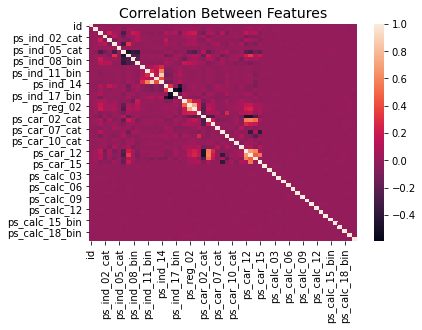

<Figure size 2200x1100 with 0 Axes>

In [20]:
# visualize the correlation between remaining features
import seaborn as sns
corr = Insurance.corr()
sns.heatmap(corr)
plt.title("Correlation Between Features", fontsize = 14)
plt.xticks(rotation = 'vertical')
plt.figure(figsize = (20,10), dpi= 110)
plt.show()


In [21]:
# drop features with '_calc_' in feature names, because they have low correlation
feature_calc = list(Insurance.columns[Insurance.columns.str.contains('_calc_')])
Insurance = Insurance.drop(feature_calc, axis = 1)
print (Insurance.shape)


(46414, 37)


In [22]:
# replace missing data in the remaining features
feature_bin = [f for f in Insurance.columns if f.endswith('bin')] 
feature_cat = [f for f in Insurance.columns if f.endswith('cat')] 
feature_els = [f for f in Insurance.columns if (f not in feature_bin) & (f not in feature_cat) & (f not in ['id', 'target'])]


In [23]:
# filling missing data with mode value for binary and categorical Data.

for f in (feature_bin + feature_cat):
    Insurance[f].fillna(value=Insurance[f].mode()[0], inplace=True)
   
# filling missing data with mean value.
for f in feature_els:
    Insurance[f].fillna(value=Insurance[f].mean(), inplace=True)



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

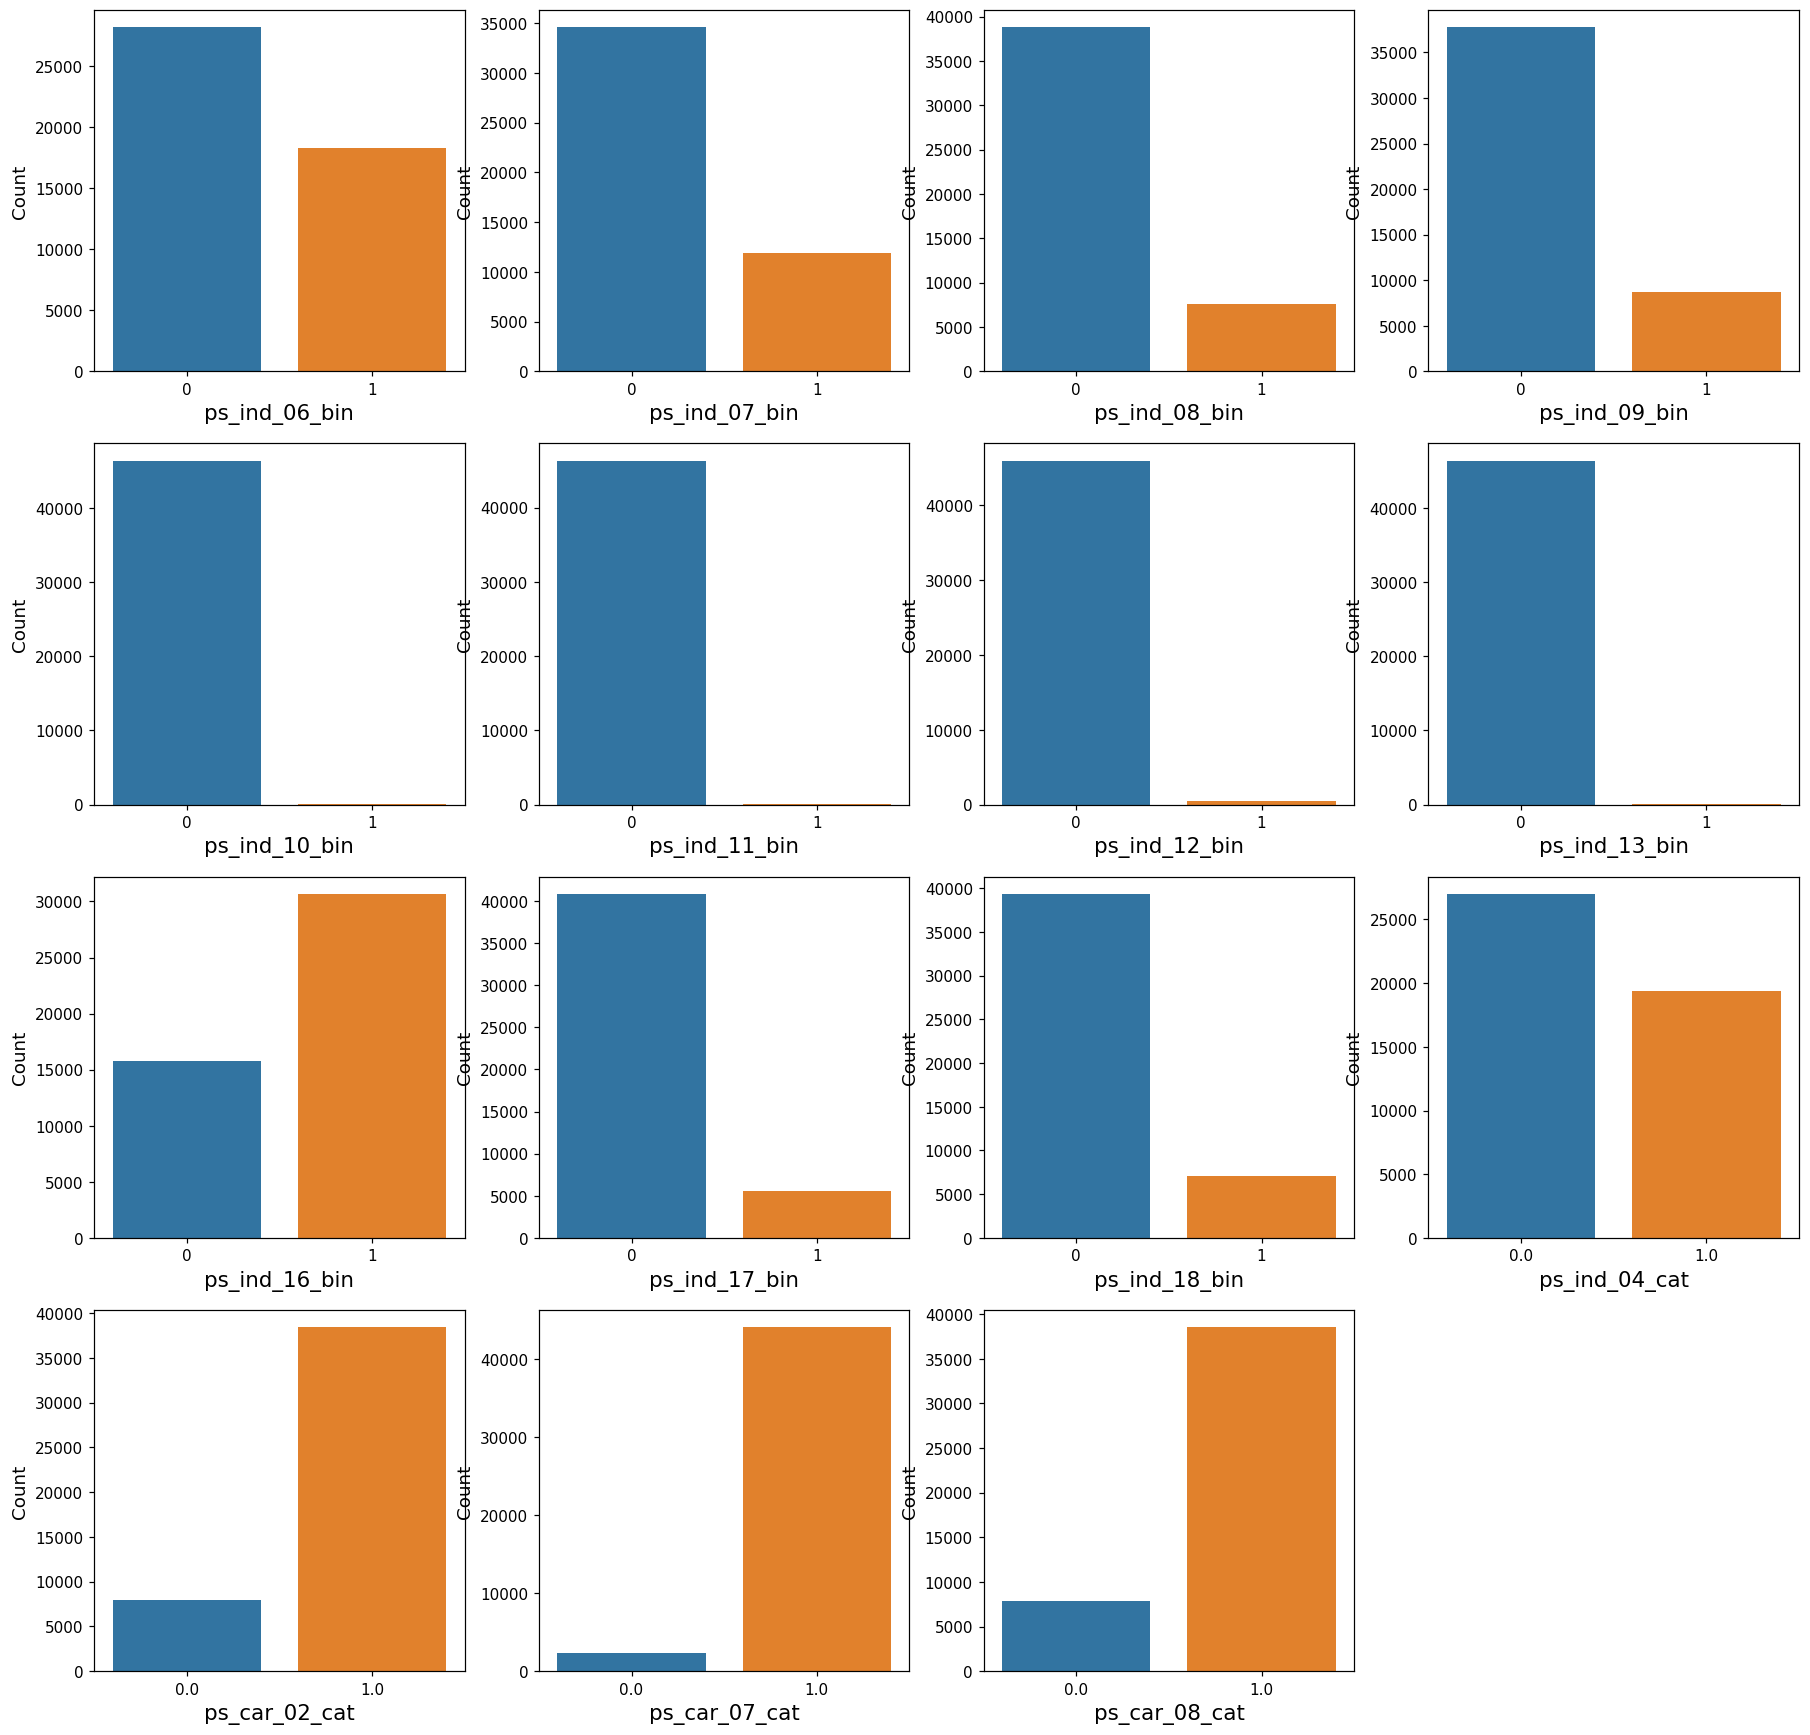

In [24]:
# Visualize binary features data and categorical features data (for styling, plot only features with 2 unique values)
plt.figure(figsize=(20, 20), dpi = 110)

count = 0

for f in (feature_bin + feature_cat):
    if  Insurance[f].nunique() <= 2:
        ax = plt.subplot(4,4,count+1)
        sns.countplot(Insurance[f])
        plt.xlabel(f, fontsize = 14)
        plt.ylabel("Count", fontsize = 12)
       # plt.ylim(0, 600000)
        count += 1
        
plt.show()

# Feature Data Distribution Subplots

In [25]:
# Class count
count_class_0, count_class_1 = Insurance.target.value_counts()

# Divide by class
df_class_0 = Insurance[Insurance['target'] == 0]
df_class_1 = Insurance[Insurance['target'] == 1]
print('Zero',count_class_0)
print('One',count_class_1)

Zero 44712
One 1702


After Random under-sampling:
1    1702
0    1702
Name: target, dtype: int64


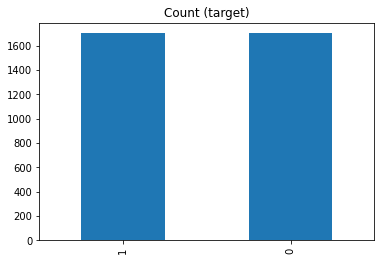

In [26]:
# Doing Random Undersampling 
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('After Random under-sampling:')
print(df_test_under.target.value_counts())

df_test_under.target.value_counts().plot(kind='bar', title='Count (target)');

In [27]:
df_test_under.dtypes

id                 int64
target             int64
ps_ind_01          int64
ps_ind_02_cat    float64
ps_ind_03          int64
ps_ind_04_cat    float64
ps_ind_05_cat    float64
ps_ind_06_bin      int64
ps_ind_07_bin      int64
ps_ind_08_bin      int64
ps_ind_09_bin      int64
ps_ind_10_bin      int64
ps_ind_11_bin      int64
ps_ind_12_bin      int64
ps_ind_13_bin      int64
ps_ind_14          int64
ps_ind_15          int64
ps_ind_16_bin      int64
ps_ind_17_bin      int64
ps_ind_18_bin      int64
ps_reg_01        float64
ps_reg_02        float64
ps_reg_03        float64
ps_car_01_cat    float64
ps_car_02_cat    float64
ps_car_04_cat    float64
ps_car_06_cat    float64
ps_car_07_cat    float64
ps_car_08_cat    float64
ps_car_09_cat    float64
ps_car_10_cat    float64
ps_car_11_cat    float64
ps_car_11        float64
ps_car_12        float64
ps_car_13        float64
ps_car_14        float64
ps_car_15        float64
dtype: object

In [28]:
df_test_under.shape

(3404, 37)

In [29]:
# From Now modelling with Undersampled and balanced Data
train2=df_test_under
y = train2['target']
X = train2.drop(['target', 'id'], axis=1)
print(X.shape)
print(X.dtypes)
print(y.shape)

(3404, 35)
ps_ind_01          int64
ps_ind_02_cat    float64
ps_ind_03          int64
ps_ind_04_cat    float64
ps_ind_05_cat    float64
ps_ind_06_bin      int64
ps_ind_07_bin      int64
ps_ind_08_bin      int64
ps_ind_09_bin      int64
ps_ind_10_bin      int64
ps_ind_11_bin      int64
ps_ind_12_bin      int64
ps_ind_13_bin      int64
ps_ind_14          int64
ps_ind_15          int64
ps_ind_16_bin      int64
ps_ind_17_bin      int64
ps_ind_18_bin      int64
ps_reg_01        float64
ps_reg_02        float64
ps_reg_03        float64
ps_car_01_cat    float64
ps_car_02_cat    float64
ps_car_04_cat    float64
ps_car_06_cat    float64
ps_car_07_cat    float64
ps_car_08_cat    float64
ps_car_09_cat    float64
ps_car_10_cat    float64
ps_car_11_cat    float64
ps_car_11        float64
ps_car_12        float64
ps_car_13        float64
ps_car_14        float64
ps_car_15        float64
dtype: object
(3404,)


In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=42) 


In [31]:
# Standard Scalar
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [32]:
#Model Number One Logistic Regresssion
from sklearn.linear_model import LogisticRegression
#classifier = LogisticRegression(class_weight={0:0, 1:1},random_state = 42 ,solver='lbfgs')
#classifier = LogisticRegression(class_weight='balanced',random_state = 0 ,solver='lbfgs')
classifier = LogisticRegression(random_state = 42 ,solver='lbfgs')
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)
#y_pred 

In [33]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print('Confusion Matrix: ', cm)

from sklearn.metrics import precision_score
pr=precision_score(y_test,y_pred)
print('Precision Score: ', pr)

from sklearn.metrics import recall_score
rc=recall_score(y_test,y_pred)
print('Recall Score: ', rc)

from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test,y_pred)
print('Accuracy Score: ', ac)

from sklearn.metrics import f1_score
Fone=f1_score(y_test,y_pred)
print('F1 Score: ',Fone)

from sklearn.metrics import classification_report
print (classification_report(y_test,y_pred))

Confusion Matrix:  [[309 217]
 [222 274]]
Precision Score:  0.5580448065173116
Recall Score:  0.5524193548387096
Accuracy Score:  0.5704500978473581
F1 Score:  0.5552178318135764
              precision    recall  f1-score   support

           0       0.58      0.59      0.58       526
           1       0.56      0.55      0.56       496

    accuracy                           0.57      1022
   macro avg       0.57      0.57      0.57      1022
weighted avg       0.57      0.57      0.57      1022



In [ ]:
## Predict Proba
#y_prob=classifier.predict_proba(X_test)
#y_pred_prob=y_prob[:,1]
#y_pred_prob=y_pred_prob.astype(int)
#accuracy_score(y_test,y_pred_prob)
#print (classification_report(y_test,y_pred_prob))
## standardization of non categorical features
##feature_non_cat = [f for f in train.columns if (f.endswith('cat') != True) & (f not in ['id', 'target'])]


In [34]:
### Model Number Two Random Forest #####
from sklearn.ensemble import RandomForestClassifier
rclf = RandomForestClassifier()
rclf.fit(X_train,y_train)
y_pred_rclf = rclf.predict(X_test)
cm_rclf=confusion_matrix(y_test,y_pred_rclf)
#print('Confusion Matrix Random Forest:' )
#cm_rclf

prlf=precision_score(y_test,y_pred_rclf)
print('Precision Score Random Forest: ', prlf)

rrlf=recall_score(y_test,y_pred_rclf)
print('Recall Score Random Forest: ', rrlf)

acclf=accuracy_score(y_test,y_pred_rclf)
print('Accuracy Score Random Forest: ', acclf)

frlf=f1_score(y_test,y_pred_rclf)
print('F1 Score Random Forest: ', frlf)

print (classification_report(y_test,y_pred_rclf))

Precision Score Random Forest:  0.5555555555555556
Recall Score Random Forest:  0.5645161290322581
Accuracy Score Random Forest:  0.5694716242661448
F1 Score Random Forest:  0.5599999999999999
              precision    recall  f1-score   support

           0       0.58      0.57      0.58       526
           1       0.56      0.56      0.56       496

    accuracy                           0.57      1022
   macro avg       0.57      0.57      0.57      1022
weighted avg       0.57      0.57      0.57      1022



In [ ]:
#y_prob_rclf=rclf.predict_proba(X_test)
#y_pred_prob_rclf=y_prob_rclf[:,1]
#y_pred_prob_rclf=y_pred_prob_rclf.astype(int)
#accuracy_score(y_test,y_pred_prob_rclf)
#print (classification_report(y_test,y_pred_prob_rclf))

In [36]:
# Model Number Three KNeighbors ##

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier.fit(X_train,y_train)
from sklearn.metrics import confusion_matrix
y_pred=classifier.predict(X_test)


In [37]:
from sklearn.metrics import confusion_matrix
cmknn=confusion_matrix(y_test,y_pred)
cmknn

array([[280, 246],
       [226, 270]])

In [38]:
prknn=precision_score(y_test,y_pred)
print('Precision Score KNeighbors : ', prknn)

rknn=recall_score(y_test,y_pred)
print('Recall Score KNeighbors: ', rknn)


aknn=accuracy_score(y_test,y_pred)
print('Accuracy Score KNeighbors: ', aknn)


Fknn=f1_score(y_test,y_pred)
print('F1 Score KNeighbors: ',Fknn)

print (classification_report(y_test,y_pred))

Precision Score KNeighbors :  0.5232558139534884
Recall Score KNeighbors:  0.5443548387096774
Accuracy Score KNeighbors:  0.538160469667319
F1 Score KNeighbors:  0.5335968379446641
              precision    recall  f1-score   support

           0       0.55      0.53      0.54       526
           1       0.52      0.54      0.53       496

    accuracy                           0.54      1022
   macro avg       0.54      0.54      0.54      1022
weighted avg       0.54      0.54      0.54      1022



In [39]:
# Model Number Four SVM
from sklearn.svm import SVC
classifierVC=SVC(kernel='linear',random_state=0)
classifierVC.fit(X_train,y_train)
y_predVC=classifierVC.predict(X_test)



In [40]:
prsvc=precision_score(y_test,y_predVC)
print('Precision Score SVC : ', prsvc)

rsvc=recall_score(y_test,y_predVC)
print('Recall Score SVC: ', rsvc)


asvc=accuracy_score(y_test,y_predVC)
print('Accuracy Score SVC: ', asvc)


Fsvc=f1_score(y_test,y_predVC)
print('F1 Score SVC: ',Fsvc)

print (classification_report(y_test,y_predVC))

Precision Score SVC :  0.5667396061269147
Recall Score SVC:  0.5221774193548387
Accuracy Score SVC:  0.5743639921722113
F1 Score SVC:  0.5435466946484785
              precision    recall  f1-score   support

           0       0.58      0.62      0.60       526
           1       0.57      0.52      0.54       496

    accuracy                           0.57      1022
   macro avg       0.57      0.57      0.57      1022
weighted avg       0.57      0.57      0.57      1022



In [41]:
## Model Number Five Decision Tree ## 
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion = "entropy", random_state = 100, 
            max_depth = 3, min_samples_leaf = 5)



# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_predclf = clf.predict(X_test)


In [42]:
prdt=precision_score(y_test,y_predclf)
print('Precision Score Decision Tree : ', prdt)

rdt=recall_score(y_test,y_predclf)
print('Recall Score Decision Tree: ', rdt)


adt=accuracy_score(y_test,y_predclf)
print('Accuracy Score Decision Tree: ', adt)


Fdt=f1_score(y_test,y_predclf)
print('F1 Score Decision Tree: ',Fdt)

print (classification_report(y_test,y_predclf))

Precision Score Decision Tree :  0.5591647331786543
Recall Score Decision Tree:  0.48588709677419356
Accuracy Score Decision Tree:  0.5645792563600783
F1 Score Decision Tree:  0.5199568500539374
              precision    recall  f1-score   support

           0       0.57      0.64      0.60       526
           1       0.56      0.49      0.52       496

    accuracy                           0.56      1022
   macro avg       0.56      0.56      0.56      1022
weighted avg       0.56      0.56      0.56      1022

